# GISCO API usage

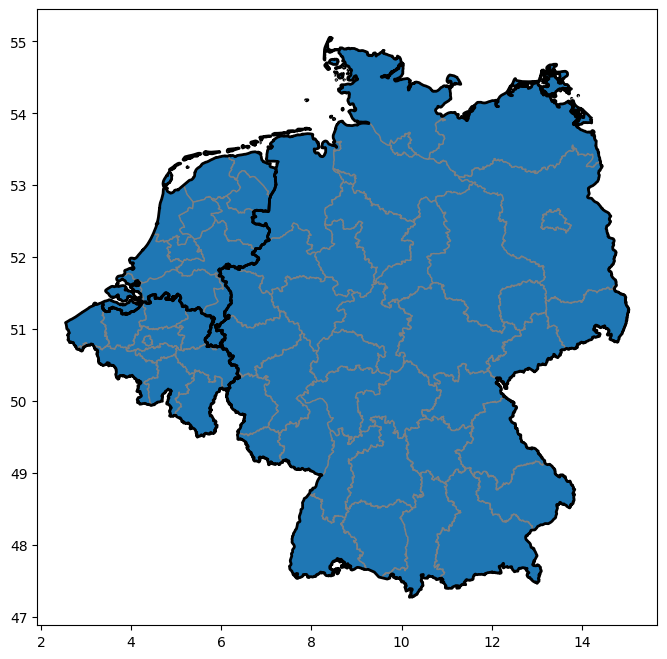

In [6]:
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

def getNUTSGeoPandasData(countries, nuts_level,
                         resolution="03M",
                         nuts_year="2016"):
  if (isinstance(countries, str)):
    countries = [countries]

  nuts_map_source = "https://gisco-services.ec.europa.eu/distribution/v2/nuts/geojson"
  geojson_file = "NUTS_RG_" + resolution + "_" + nuts_year + "_4326_LEVL_" + nuts_level[-1] + '.geojson'

  geo_nutsx_df = gpd.read_file(nuts_map_source + '/' + geojson_file)
  geo_nutsx_df = geo_nutsx_df.drop(columns=['id', 'LEVL_CODE', 'FID'])
  geo_nutsx_df = geo_nutsx_df.rename(columns={ 'CNTR_CODE' : 'COUNTRY'} )
  geo_nutsx_df = geo_nutsx_df[geo_nutsx_df['COUNTRY'].isin(countries)]

  return geo_nutsx_df

def plotStaticMap(geo_nuts0_df, geo_nutsx_df):
  fig, ax = plt.subplots(1, 1, figsize=(8, 8))
  base = geo_nutsx_df.plot(ax=ax,
                           linewidth=1.0, edgecolor='gray')
  geo_nuts0_df.plot(ax=base, edgecolor='black', linewidth=2.0, facecolor="none")

countries = ['DE', 'NL', 'BE']
geo_NUTS0_df = getNUTSGeoPandasData(countries, 'NUTS0', resolution="01M")
geo_NUTS2_df = getNUTSGeoPandasData(countries, 'NUTS2', resolution="01M")
plotStaticMap(geo_NUTS0_df, geo_NUTS2_df)